<h4> Grupowanie górskie

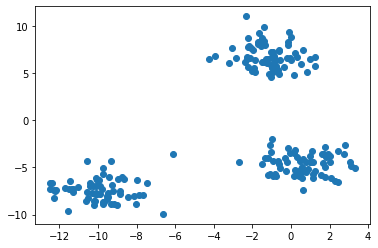

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Text(0.5, 0.92, 'surface')

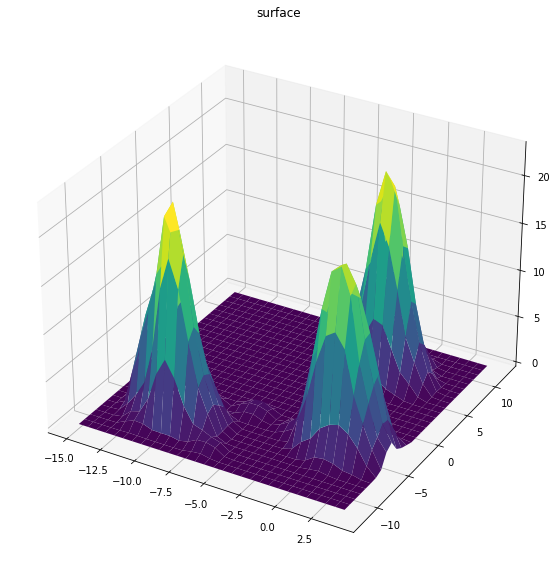

In [6]:
import math as mt

def norma(c, x, b=1, sigma=1):
    x = np.array(x)
    t = ((np.dot(x-c,x-c))**(2*b))/(2*sigma**2)
    return t

def f(x,y):
    c = [x,y]
    w = 0
    for i in range(len(X)):
        w += mt.exp(-norma(c, X[i]))
    return w

import copy
k = 30
x = np.linspace(-15, 4, k)
y = np.linspace(-12, 12, k)

X1, Y1 = np.meshgrid(x,y)
Z1 = copy.deepcopy(X1)
for i in range(k):
    for j in range(k):
        Z1[i,j] = f(X1[i,j], Y1[i,j])
        
fig = plt.figure(1, figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.plot_surface(X1, Y1, Z1, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_title("surface")

Text(0.5, 0.92, 'surface')

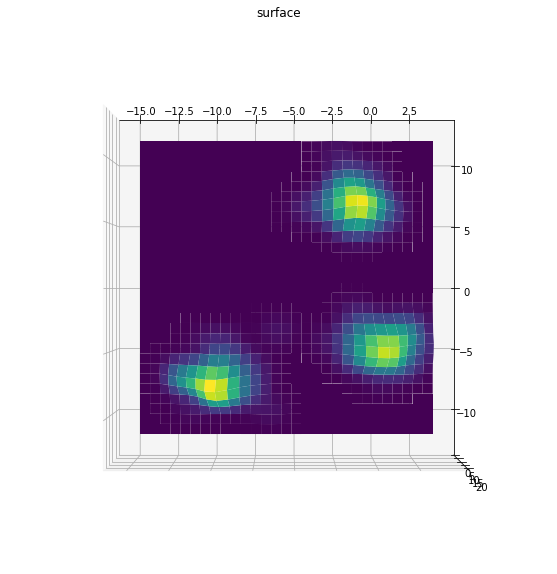

In [7]:
fig = plt.figure(1, figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.view_init(azim=270, elev=90) #widok z gory
ax.plot_surface(X1, Y1, Z1, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_title("surface")

Text(0.5, 0.92, 'surface')

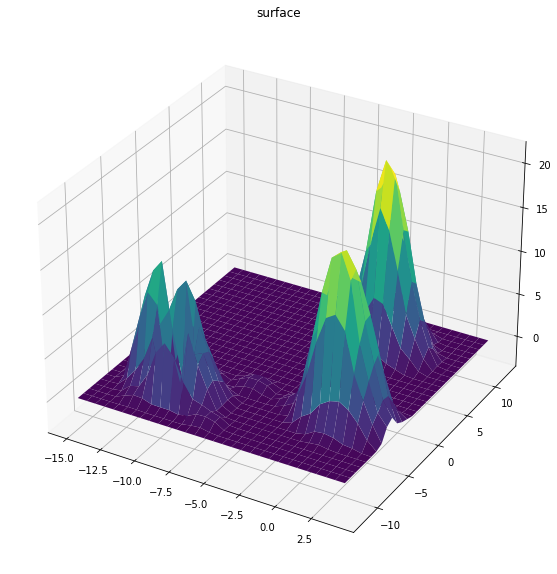

In [8]:
#pierwsze centrum
c1 = [0,0]
z = 0
for i in range(k):
    for j in range(k):
        if Z1[i,j]>z:
            c1[0] = X1[i,j]
            c1[1] = Y1[i,j]
            z = Z1[i,j]
            
import math as mt
Z2 = copy.deepcopy(X1)
for i in range(k):
    for j in range(k):
        Z2[i,j] = f(X1[i,j],Y1[i,j]) - f(c1[0],c1[1])*mt.exp(-norma([X1[i,j],Y1[i,j]], c1))
        
fig = plt.figure(1, figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.plot_surface(X1, Y1, Z2, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_title("surface")

Text(0.5, 0.92, 'surface')

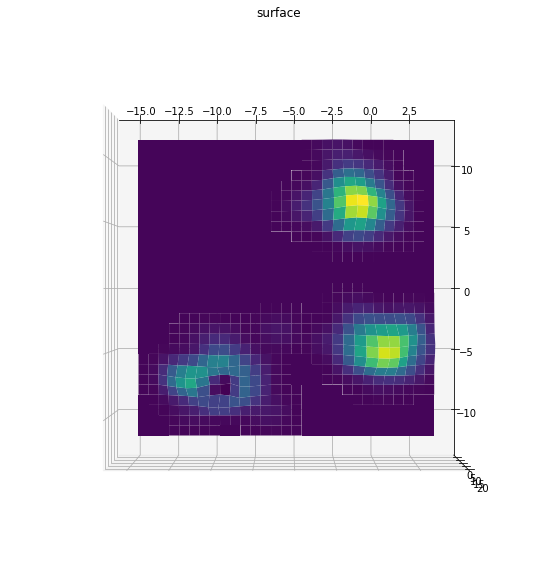

In [9]:
fig = plt.figure(1, figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.view_init(azim=270, elev=90) #widok z gory
ax.plot_surface(X1, Y1, Z2, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_title("surface")

Text(0.5, 0.92, 'surface')

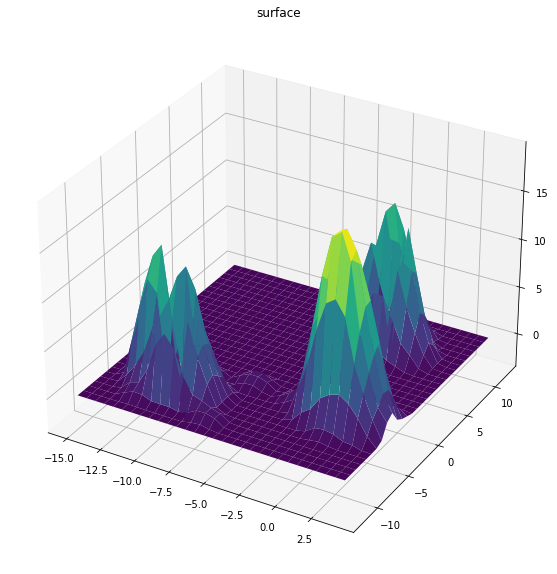

In [10]:
#drugie centrum
c2 = [0,0]
z = 0
for i in range(k):
    for j in range(k):
        if Z2[i,j]>z:
            c2[0] = X1[i,j]
            c2[1] = Y1[i,j]
            z = Z2[i,j]
            
import math as mt
Z3 = copy.deepcopy(X1)
for i in range(k):
    for j in range(k):
        Z3[i,j] = f(X1[i,j],Y1[i,j]) - f(c1[0],c1[1])*mt.exp(-norma([X1[i,j],Y1[i,j]], c1)) - f(c2[0],c2[1])*mt.exp(-norma([X1[i,j],Y1[i,j]], c2))
        
fig = plt.figure(1, figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.plot_surface(X1, Y1, Z3, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_title("surface")

Text(0.5, 0.92, 'surface')

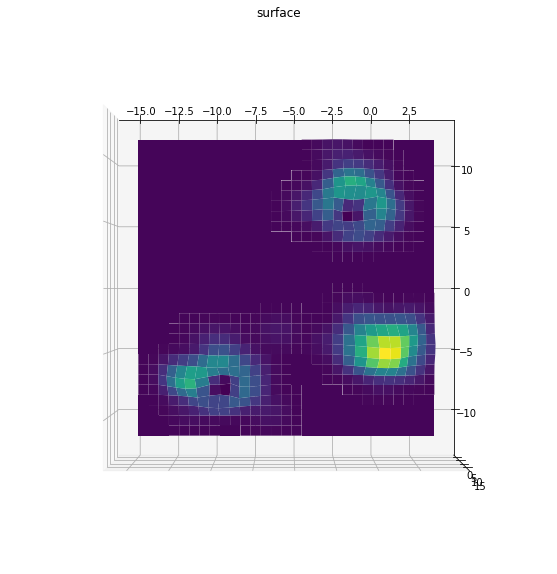

In [11]:
fig = plt.figure(1, figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.view_init(azim=270, elev=90) #widok z gory
ax.plot_surface(X1, Y1, Z3, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_title("surface")

Text(0.5, 0.92, 'surface')

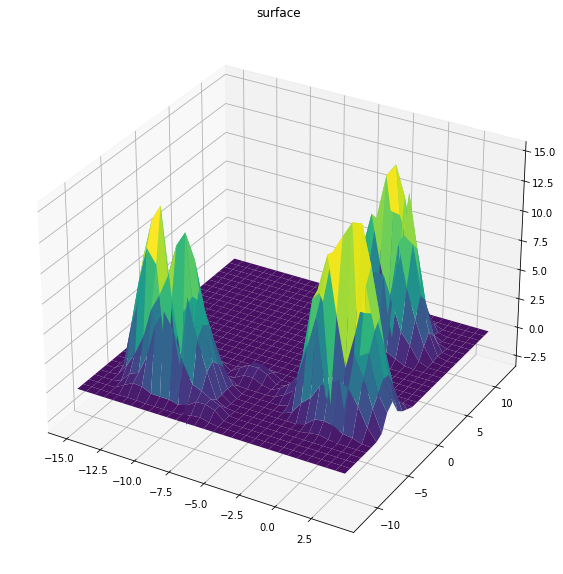

In [12]:
#trzecie centrum
c3 = [0,0]
z = 0
for i in range(k):
    for j in range(k):
        if Z3[i,j]>z:
            c3[0] = X1[i,j]
            c3[1] = Y1[i,j]
            z = Z3[i,j]
            
import math as mt
Z4 = copy.deepcopy(X1)
for i in range(k):
    for j in range(k):
        Z4[i,j] = f(X1[i,j],Y1[i,j]) - f(c1[0],c1[1])*mt.exp(-norma([X1[i,j],Y1[i,j]], c1)) - f(c2[0],c2[1])*mt.exp(-norma([X1[i,j],Y1[i,j]], c2))- f(c3[0],c3[1])*mt.exp(-norma([X1[i,j],Y1[i,j]], c3))
        
fig = plt.figure(1, figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.plot_surface(X1, Y1, Z4, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_title("surface")

Text(0.5, 0.92, 'surface')

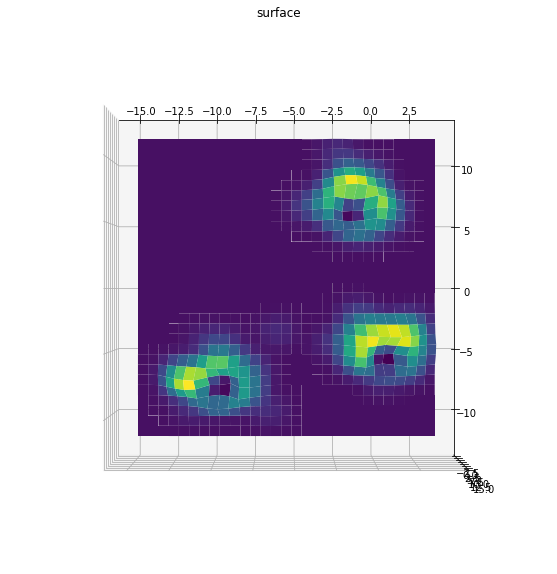

In [13]:
fig = plt.figure(1, figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.view_init(azim=270, elev=90) #widok z gory
ax.plot_surface(X1, Y1, Z4, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_title("surface")

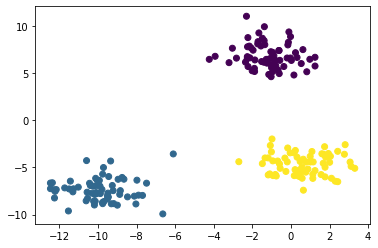

In [14]:
#przynaleznosc 

p = []
for i in range(len(X)):
    k1 = mt.exp(-norma(X[i], c1))
    k2 = mt.exp(-norma(X[i], c2))
    k3 = mt.exp(-norma(X[i], c3))
    
    if k1>k2 and k1>k3:
        p.append(1)
    elif k2>k1 and k2>k3:
        p.append(0)
    else:
        p.append(3)
        
plt.scatter(X[:, 0], X[:, 1], c = p)
plt.show()

<h4> Algorytm Gustafsona-Kessela

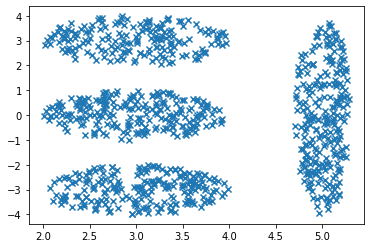

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0],X[:,1], marker = "x")
plt.show()

In [2]:
def d(x,c,A):
    return (np.dot(x-c,np.dot(A,x-c)))**0.5


centers = np.array([[5.,0], [3.,3], [3.,0], [3.,-3]])
A = np.array([np.identity(2), np.identity(2), np.identity(2),np.identity(2)])
S = np.array([np.identity(2), np.identity(2), np.identity(2),np.identity(2)])

m = 2

U = np.zeros((len(X), 4)) #4 kolumny
for epoch in range(3):
    #aktualizuje u (przynaleznosci)
    for i in range(len(X)):
        for j in range(4):
            U[i][j] = 1/sum([(d(X[i],centers[j],A[j])/d(X[i],centers[k],A[j]))**(2/(m-1)) for k in range(4)])        
    #aktualizuje c (centra)
    for j in range(4):
        centers[j] = sum([(U[k][j]**m)*X[k] for k in range(len(X))])/sum([(U[k][j]**m) for k in range(len(X))])       
    #aktualizuje S (macierze kowariancji)
    for j in range(4):
        S[j] = sum([(U[k][j]**m)*np.outer(X[k]-centers[j],X[k]-centers[j]) for k in range(len(X))])/sum([(U[k][j]**m) for k in range(len(X))])   
    #aktualizuje A (macierze skalujące)
    for j in range(4):
        A[j] = (np.linalg.det(S[j])**(1/2))*np.linalg.inv(S[j])  

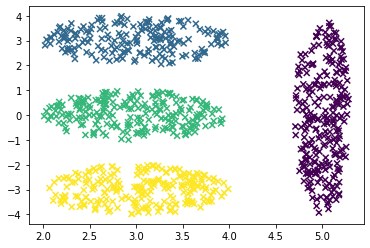

In [3]:
plt.scatter(X[:,0],X[:,1], marker = "x", c = np.argmax(U, axis=1))
plt.show()